In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
data = np.load('./spectra_0p66_interp.npz')
frequencies = data['frequencies']
gwb_model = 'bpl'
Omegas = data[f'gw_{gwb_model}'] 
kstar = 1e-3
omks_sigma = Omegas * (0.05 * (np.log(frequencies / kstar))**2 + 0.1)
cov = np.diag(omks_sigma**2)
num_nodes = 5
free_nodes = num_nodes - 2
pk_arr = data['pk_arr']
pk_min, pk_max = min(pk_arr), max(pk_arr)
# pk_min, pk_max = np.array(min(frequencies) / fac), np.array(max(frequencies) * fac)
left_node = np.log10(pk_min)
right_node = np.log10(pk_max)

equal_file = np.loadtxt(f'./chains/bpl_pchord_free_{num_nodes}_equal_weights.txt')
data_file = np.loadtxt(f'./chains/bpl_pchord_free_{num_nodes}.txt')
print(equal_file.shape)
print(data_file.shape)





(73, 60)
(1638, 60)


[ 6.65535318e-01  3.63223692e+00  3.70437048e-01 -3.38199130e+00
 -2.89274432e+00 -1.30366754e+00 -7.47854707e+00 -2.06511625e+00
 -1.73763448e+00 -2.52980007e+00  3.39560499e-11  4.33015006e-11
  5.50548754e-11  6.97661925e-11  8.80819323e-11  1.10741888e-10
  1.38571113e-10  1.72456578e-10  2.13290427e-10  2.61991770e-10
  3.18987451e-10  3.84867596e-10  4.59459479e-10  5.42143413e-10
  6.31884686e-10  7.27776594e-10  8.30349545e-10  9.43967159e-10
  1.07975447e-09  1.25527624e-09  1.48791555e-09  1.78050966e-09
  2.10615213e-09  2.43951662e-09  2.77497491e-09  3.10686296e-09
  3.44841064e-09  3.80615408e-09  4.20390597e-09  4.61449789e-09
  4.97254727e-09  5.21601442e-09  5.29860474e-09  5.21917802e-09
  5.02778321e-09  4.72919405e-09  4.39976577e-09  4.05216802e-09
  3.70659895e-09  3.41956095e-09  3.07798891e-09  2.79090188e-09
  2.53544930e-09  2.30316749e-09  2.09171229e-09  1.89958466e-09
  1.72452482e-09  1.64527712e-09  1.42500038e-09  1.29304887e-09]
start and end: 3 6 6 11


ValueError: x and y must have same first dimension, but have shapes (50,) and (49,)

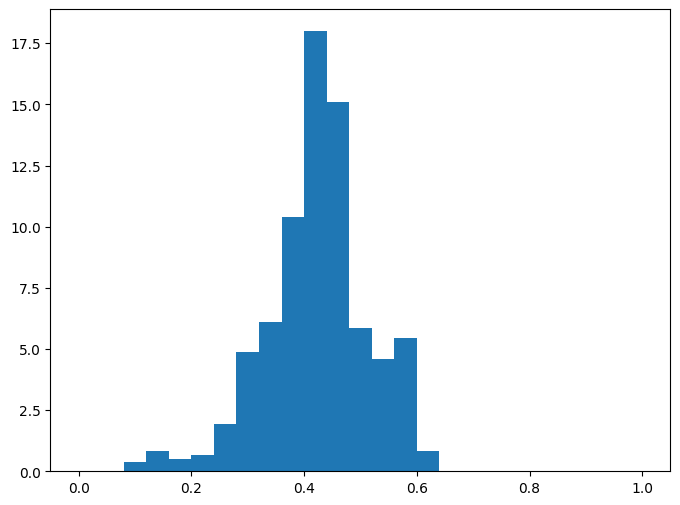

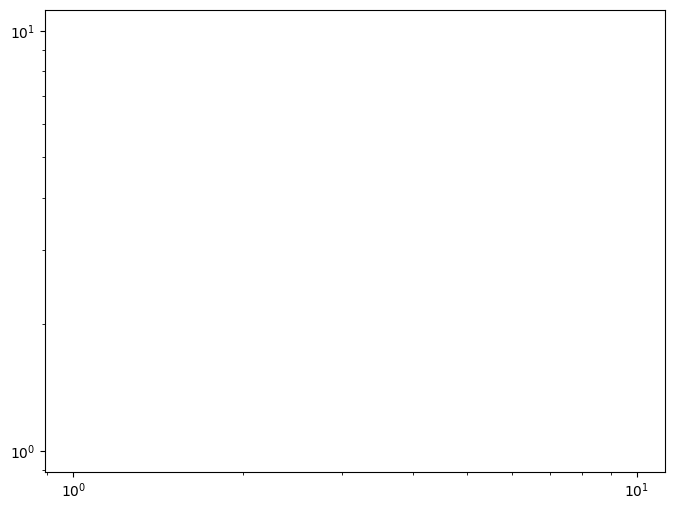

In [20]:
# data file has weights -2*logL w xs (free_nodes) ys (num_nodes) derived_params (omegas at frequencies)
num_nodes = 5
best_idx = np.argmin(data_file[:, 1])
weights = data_file[:, 0]
ws = data_file[:, 2]

plt.figure(figsize=(8, 6))
plt.hist(ws, weights=weights, bins=25,range=(0, 1))

print(data_file[best_idx])

xs_start = 3
xs_end = xs_start + num_nodes - 2
ys_start = xs_end
ys_end = ys_start + num_nodes
xs = data_file[:, xs_start:xs_end]
xs = np.pad(xs, ((0, 0), (1, 1)), 'constant', constant_values=((0, 0), (left_node, right_node)))
ys = data_file[:, ys_start:ys_end]
omega_start = ys_end
print(f'start and end: {xs_start} {xs_end} {ys_start} {ys_end}')
omegas = data_file[:, omega_start:]
print(f"shapes: omegas: {omegas.shape}, xs: {xs.shape}, ys: {ys.shape}")
best_omega = omegas[best_idx]
# plt.loglog()
plt.figure(figsize=(8, 6))
plt.loglog(frequencies,best_omega)
plt.loglog(frequencies, Omegas, color='k', lw=1.5, label='Truth')
plt.errorbar(frequencies, Omegas, yerr=np.sqrt(np.diag(cov)), 
             fmt='o', color='k', capsize=4.,alpha=0.5,markersize=2)


intervals=[99.7, 95., 68.]
interval_cols=[('#006FED', 0.2), ('#006FED', 0.4), ('#006FED', 0.6)]

for j, interval in enumerate(intervals):
    print(interval)
    y_low, y_high = np.percentile(omegas, [50 - interval / 2, 50 + interval / 2], axis=0
                                          ,weights=weights,method='inverted_cdf')
    plt.fill_between(frequencies, y_low, y_high, color=interval_cols[j][0], alpha=interval_cols[j][1])

plt.legend()